This script was inspired by a comment I found:

PIC

Also search shows that this problem is actual

https://www.gov.uk/government/news/uk-exposes-sick-russian-troll-factory-plaguing-social-media-with-kremlin-propaganda - UK exposes sick Russian troll factory plaguing social media with Kremlin propaganda

#### Background
**Key findings include**
<ul>
  <li>a new troll farm that is seeking to guide and ‘brigade’ a wider network of supporters and sympathisers to engage in targeted trolling behaviours</li>
  <li>this information operation and its associated targeted trolling activities are being directed at senior international politicians and international media outlets</li>
  <li>traces of the operation have been detected across eight social media platforms including Telegram, Twitter, Facebook and TikTok</li>
  <li>key tactical innovations of the operational methodology include the use of commenting behaviours, use of VPNs and deliberate amplification of ‘organic’ content supporting the Kremlin’s position. All of these methods help to avoid detection and interception by social media platforms</li>
</ul>


**Troll tactics**

<ul>
<li>calling on subscribers to target the social media profiles of opponents and Kremlin critics, including prominent politicians and world leaders, and spam them with pro-Kremlin comments</li>
<li>asking them to turn on VPNs and spam the comments sections of specific links to Instagram, YouTube, and Telegram</li>
<li>focusing activity on posting comments, rather than authoring original content – a tactic likely to decrease the risks of being detected by social media platforms for engaging in coordinated inauthentic behaviour and/or harmful content</li>
<li>searching for ‘organic content’ posted by genuine users coherent with the lines they want to push, and then working to amplify these messages, in order that such views are distorted as the norm. This means that, provided the content they post is not too offensive, they are unlikely to be subject to de-platforming interventions</li>
</ul>


### Source data
The initial data set contains parsing (partial, full) of 1500 telegram channels from Mainly contains Russian-language and Ukrainian-language channels. 

It was created for studying: <ul>
<li>hate speech</li>
<li>Internet trolll </li>
<li>bot farms detection</li>
<li>work with text corpus</li>
</ul>


Statistics:<ul>
<li>channels</li>
<li>unique users</li>
<li>posts</li>
<li>comments</li>  
</ul>    
    
To start using, you need to download the data from the link (uTorrent):
magnet:?xt=urn:btih:b3c00c5532e34c400a78a287634cf99b49907c47

Or use .torrent file Telegram_reader_archive_snapshot_2023_02_19.rar.torrent

Then unzip the files to the data directory. The jobs.csv file must be in the same directory as the script


In [1]:
columns_jobs = ['channel', 'date', 'priority', 'min_last_id', 'max_last_id', 'full','channel_id']

columns_chats = ['id', 'title', 'date','username', 'participants_count',
'creator', 'left', 'broadcast', 'verified', 'megagroup',
 'restricted', 'signatures', 'min', 'scam', 'has_link', 'has_geo',
 'slowmode_enabled', 'call_active', 'call_not_empty', 'fake', 'gigagroup',
 'noforwards', 'join_to_send', 'join_request', 'forum']

columns_messages = ['id', 'channel_id', 'date', 'out', 'message','views', 'forwards', 'mentioned', 
                    'replies', 'edit_date',
                    'total_emoji', 'positive_emoji', 'negative_emoji',
                    'media_unread', 'silent', 'post', 'from_scheduled', 'legacy',
'edit_hide', 'pinned', 'noforwards', 'from_id', 'fwd_from', 'via_bot_id', 'reply_to', 'post_author',
'grouped_id',  'mention',
                   'fwd_from_date','fwd_from_channel_id','fwd_from_from_name',
                    'fwd_from_channel_post','fwd_from_post_author']

columns_comments =  ['id', 'channel_id', 'message_id', 'user_id', 'date', 'message', 'out', 'mentioned', 'media_unread',
 'silent', 'post', 'from_scheduled', 'legacy', 'edit_hide', 'pinned', 'noforwards', 'fwd_from',
 'via_bot_id', 'reply_to_msg_id', 'reply_to_scheduled', 'forum_topic', 'reply_to_peer_id',
 'reply_to_top_id', 'reply_markup', 'views', 'forwards', 'replies', 'edit_date', 'post_author',
 'grouped_id', 'reactions', 'ttl_period',   ]

columns_users = [ 'id', 'access_hash', 'first_name', 'last_name', 'username', 'phone', 'status', 'was_online', 
 'expires', 'bot_info_version', 'bot_inline_placeholder', 'lang_code', 'emoji_status', 'is_self',
 'contact', 'mutual_contact', 'deleted', 'bot', 'bot_chat_history', 'bot_nochats', 'verified', 'restricted',
 'min', 'bot_inline_geo', 'support', 'scam', 'apply_min_photo', 'fake', 'bot_attach_menu', 'premium',
 'attach_menu_enabled',    

]

columns_links = ['url', 'title', 'mention', 'date', 'message_id', 'channel_id', 'username']
columns_mentions = ['mention', 'message_id', 'channel_id', 'date', 'username', ]

columns_black_list = ['channel']

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
# import warnings
# warnings.simplefilter("ignore", UserWarning)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
try:
    path = '..\\Telegram_reader\\'
    f = open("path.txt", "r")
    path = f.read()
except:
    path = ''

In [4]:
# import socket
# socket.gethostname()

In [5]:
path

'..\\\\Telegram_reader\\\\'

### Top users
Simple statistics

Users who left a lot of comments are suspected of being bots

In [6]:
import pandas as pd
df_gr = pd.DataFrame(columns = ['user_id','channel_id','date_min','date_max','count'])


df_jobs = pd.read_csv(path+'jobs.csv', usecols = columns_jobs)
for job_idx in range(df_jobs.shape[0]):
    channel     = df_jobs.iloc[job_idx].channel
    print(job_idx, channel)
    try:
        df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
        df_comments_all = df_comments_all.rename({'id':'comment_id'}, axis = 1)
        df_comments_all = df_comments_all.drop(['Unnamed: 0','Unnamed: 1'], axis=1, errors='ignore')
    except:
        df_comments_all = pd.DataFrame(columns = columns_comments)
        df_comments_all = df_comments_all.rename({'id':'comment_id'}, axis = 1)    
        
#     try:
#         df_users_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_users_all.csv')
#         df_users_all = df_users_all.rename({'id':'user_id'}, axis = 1) 
#         df_users_all = df_users_all.drop(['Unnamed: 0','Unnamed: 1'], axis=1, errors='ignore')
#     except:
#         df_users_all    = pd.DataFrame(columns = columns_users)
#         df_users_all    = df_users_all.rename({'id':'user_id'}, axis = 1)  
#     try:
#         df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')
#         df_messages_all = df_messages_all.rename({'id':'message_id'}, axis = 1)
#         df_messages_all = df_messages_all.drop(['Unnamed: 0','Unnamed: 1'], axis=1, errors='ignore')
#     except:
#         df_messages_all = pd.DataFrame(columns = columns_messages)
#         df_messages_all = df_messages_all.rename({'id':'message_id'}, axis = 1)
#     try:
#         df_chats_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_chats_all.csv')
#         df_chats_all = df_chats_all.rename({'id':'chat_id'}, axis = 1)
#         df_chats_all = df_chats_all.drop(['Unnamed: 0','Unnamed: 1'], axis=1, errors='ignore')
#     except:
#         df_chats_all    = pd.DataFrame(columns = columns_chats)
#         df_chats_all    = df_chats_all.rename({'id':'chat_id'}, axis = 1)       
    if df_comments_all.shape[0] > 1:
        df_gr2 = df_comments_all.groupby(['user_id','channel_id']).agg({'date':['min','max'],
                                                                        'message_id':'count'}).reset_index()
        df_gr2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_gr2.columns] 
        df_gr2.columns = ['user_id','channel_id','date_min','date_max','count']
        df_gr2['date_min'] = pd.to_datetime(df_gr2['date_min']) 
        df_gr2['date_max'] = pd.to_datetime(df_gr2['date_max']) 
        df_gr2['delta'] = df_gr2['date_max'] - df_gr2['date_min']
        df_gr2['freq'] = df_gr2['delta'] / df_gr2['count']

        df_gr = pd.concat([df_gr, df_gr2], ignore_index = False)
    
df_gr = pd.merge(df_gr, df_jobs, how = 'left', on = 'channel_id')
  

0 ugolokz
1 WCIOMofficial
2 ASWman
3 foxandraven
4 rstv01
5 elpicahielo
6 oneterrikon
7 NeBrigada
8 ssignl
9 smak_media
10 ntvnews
11 spravedlivo
12 porubezhye
13 news_sev
14 patricklancasternewstoday
15 retro_music_knyga
16 posidimobsudim
17 tv360
18 olen_nn
19 nzdnipro
20 mosrutop
21 RWMaloneMD
22 nic_and_mike
23 regdurdom
24 next_stop_by
25 NKavkazsky
26 rqnst
27 svoborus
28 go338
29 TyskNIP
30 nevrotique
31 wingsofwar
32 pfci_grants
33 dbaturin
34 bunker_polit
35 politsputnik
36 minjust_dnr
37 tplviv
38 sakeritalianotizie
39 tihyidon
40 moscowtimes_ru
41 guardwhite
42 u_renovate
43 Gryshyna_channel
44 Nevrotique
45 flagshtok
46 vladimirbidyovka
47 EvPanina
48 vesti_izdyrki
49 nemchinovoleh
50 IvanDzuban
51 emigriceps
52 hyzyl
53 apasov_ua
54 yaremshooter
55 vatnoeboloto
56 zradaperemoga
57 yapnews
58 sevstory
59 official_moscow
60 martynov2021
61 belarusian_history
62 Ze_News_Ukraine
63 peremogi
64 imaguru
65 protest_kuzbass_chat
66 all_russians_should_die
67 rossotrudnichestvo
68 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


427 kashinguru
428 topalov_oplot
429 combat_cypress
430 homoscience_ru
431 crisispr
432 plutovstvo007
433 israelhumor
434 sababablog
435 minut30
436 tourdom
437 sabreenS1
438 cinemaniacmax
439 iccmoscow
440 butiyljok
441 openstudio78
442 bumaznayaZmeya
443 zoomer_kingdom
444 fsbach
445 Murmansk_insaid
446 vklader
447 odinokayakoko
448 tagankaroof
449 odessa_typical
450 RusMissionOSCE
451 severyanovR
452 a_beglov
453 sp_1703
454 izvestnose
455 mediakiller
456 gnmoscow
457 fatcat18
458 infoshtab
459 kommersant18
460 solono_stihi
461 arevord
462 dvach18
463 izvmor
464 moscowurbanforum
465 Voenkor_reZervist
466 nvrsk_new
467 vesti_murman
468 benderfromsiberia
469 BALTNEWS
470 brand_shop_99999
471 GazMyaso
472 nenubesit
473 RaskladSib
474 rossaprimavera
475 Police63
476 ria_realty
477 PanSwiridow
478 koteikino_carstvo
479 moscowtoplive
480 dnronline
481 ShopahoLee
482 powerofplace
483 driversrussia
484 elona
485 mgchuprina
486 kalmykia08
487 ezhkinkot_chat
488 nortm
489 black_triangle_tg
49

942 ukraina_novosti
943 bavovnochka
944 shmel_chik
945 u_now
946 savchuk_serg
947 polylog_expertise
948 place_kh
949 pristavy
950 tonfrogs
951 kseniyshhh
952 GTRKLNR_Lugansk24
953 vzglyad_ru
954 prorobots
955 IFUnews
956 knifemedia
957 reo_ru
958 odinobl
959 nevzorovalidia
960 aplusaplusplus
961 donetch
962 ArmsControlFreak
963 mariachicircle
964 dobroinrussia
965 liababaeva
966 infodoc
967 netipichka
968 sashakots
969 Grey_Zone
970 nezlaminstbot
971 porybly
972 chistiydomidvor
973 notesinthemargin
974 philosophycafemoscow
975 NY_USA_World
976 mkipu
977 urent_russia
978 mkset
979 TsypkinTheRealOne
980 holmogortalks
981 Zhyvytskyy
982 HaifaChat
983 vaccynic
984 malikovmedia
985 furydrops
986 SvetEkb
987 reartsakh
988 abramchenko_channel
989 kurgankyiks
990 WAW_WarAgainstWar
991 zloyodessit
992 Anatolii_Artamonov
993 breakingmash
994 south0wind
995 zubarevich
996 chemrarpharma
997 KlymenkoTime
998 rkn_tg
999 MoldovaPolitics
1000 MaksymZhorin
1001 dzianisivashyn
1002 kagarlitsky
1003 news

1414 balkanossiper
1415 zakryte_susp
1416 RightLit
1417 mova_tg
1418 adamtactic
1419 marketpsy_chat_rules
1420 squad_431
1421 Babelky
1422 Ruh_Patriotiv
1423 PresidentPoroshenko
1424 militarymediacenter
1425 dorolenko
1426 salkov_molchanovo
1427 annamaliar
1428 slavvarda
1429 zekovnet
1430 petrushevskyi
1431 Match_TV
1432 kryseva
1433 TimZhur
1434 kharizvestia
1435 drugoeeto
1436 yigal_levin
1437 tagilcityru
1438 ukraina_ru
1439 belteanews
1440 m0sc0wcalling
1441 omskpub55
1442 vmolnia
1443 jexenews
1444 sotaproject
1445 markkot56
1446 newsru_com
1447 permyach
1448 BastaGD
1449 zhurbomba
1450 sodovaya
1451 kbrvdvkr
1452 pokraslampas
1453 brane_upgrade
1454 PMRlesnik
1455 volrota
1456 robabayan
1457 krassdogs
1458 lanabadvan
1459 ombr66
1460 MaxHave
1461 ScottRitter
1462 prosiliperedat
1463 octoberbel
1464 neoficialniybezsonov
1465 nauchnaya_iznanka
1466 redzion
1467 NOCRB
1468 avito_b2b
1469 mintrudrf
1470 ProDiscountsUA
1471 tr_media
1472 byvshie1991
1473 kuban24
1474 tvgubernia
1475 

1883 zelenskiynewss
1884 bash_zhalo
1885 rznpolitics
1886 branimir85
1887 ua_dshv
1888 the_village_me
1889 OstanniyCapitalist
1890 kommersantvrn
1891 milchronicles
1892 cadet1mkk
1893 garagemca
1894 maslennikovliga
1895 smotri_kakoi_text
1896 VGrudina
1897 philologist_zov
1898 universelfity
1899 TonBlogRu
1900 geekorama
1901 mka_na
1902 Novostidnua
1903 uniannet
1904 kyivoperativ
1905 takinet
1906 Abbasdjuma
1907 rybar
1908 RottenKepkenChannel
1909 dnipro_now
1910 KurbanovaNEWS
1911 Marinaslovo
1912 zhuk_ua
1913 n0comments
1914 AteoGo
1915 IABelRu
1916 TGAwaken
1917 ykt_sun
1918 minarety
1919 KirillSchitov
1920 saransktg
1921 MoexFinuslugi
1922 yartop12
1923 kuinnyy
1924 m_kolokol
1925 shulzmax
1926 shpir
1927 vassal_of_the_Joker
1928 COVID2019_official
1929 razomworld
1930 russanmediya
1931 fuckingenglish
1932 flebolog_orlov
1933 imoscow
1934 objectivetv
1935 activatica
1936 figureskatingfan
1937 noviop
1938 polittemnik
1939 RU66RU
1940 rooffest
1941 cleancountry
1942 ShugaevaNauka
19

2362 avatkov
2363 middleastguide
2364 fond_kadyrova
2365 suspilne_kazky
2366 mkhusnullin
2367 ukr_sof
2368 etozhekoval
2369 otkritie
2370 kremlebezBashennik
2371 hockeyzambony
2372 thgreatunknown
2373 prgvrka
2374 advocatsovet
2375 babchenko77
2376 solovei_ihor
2377 bankrollo
2378 senator_isakov
2379 sberstartup
2380 sprava_groma
2381 israeltoday
2382 osintflow
2383 fonartv
2384 good_events_russia
2385 ruspetsnaz
2386 bratskiyvopros
2387 Tonex_app
2388 genprocrf
2389 chto_delat_2022
2390 time_z_now
2391 gorodzadaniy
2392 oskoladm31
2393 open_space_help
2394 NeoficialniyBeZsonoV
2395 IranPakistanAfganistan
2396 M_Podolyak
2397 AmericanCommunityinRussia
2398 Aksenov82
2399 isr_introvert
2400 arbaletgovorit
2401 strelkovii
2402 grabscape
2403 DV_Sablin
2404 lecturerhistory
2405 ausguck
2406 ctotoznayu
2407 international_labour
2408 AlfaBank
2409 warzart
2410 britishpolitics
2411 TrO_98_Dnipro
2412 azatmale02
2413 tolk_tolk
2414 InformNapalm
2415 minsport73
2416 za_4_morya
2417 ASupershari

In [7]:
df_gr.head() 

,user_id,channel_id,date_min,date_max,count,delta,freq,channel,date,priority,min_last_id,max_last_id,full
0,216211,1104078477,2022-07-25 12:02:57+00:00,2022-07-25 12:02:57+00:00,1,0 days 00:00:00,0 days 00:00:00,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0
1,704792,1104078477,2022-12-03 14:18:34+00:00,2022-12-03 14:18:34+00:00,1,0 days 00:00:00,0 days 00:00:00,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0
2,1020249,1104078477,2022-12-02 13:41:08+00:00,2022-12-02 13:45:41+00:00,2,0 days 00:04:33,0 days 00:02:16.500000,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0
3,1926344,1104078477,2023-01-20 08:32:47+00:00,2023-01-20 08:32:47+00:00,1,0 days 00:00:00,0 days 00:00:00,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0
4,3528277,1104078477,2022-12-03 00:05:36+00:00,2022-12-03 00:05:36+00:00,1,0 days 00:00:00,0 days 00:00:00,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0


In [8]:
df_gr.shape

(4156247, 13)

In [9]:
df_gr3 = df_gr.groupby(['user_id']).agg({'date_min':['min'],'date_max':['max'],
                        'channel_id':'count','count':'sum'}).reset_index()
df_gr3.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_gr3.columns] 
df_gr3.columns = ['user_id','date_min','date_max','channel_count','count']
df_gr3['date_min'] = pd.to_datetime(df_gr3['date_min']) 
df_gr3['date_max'] = pd.to_datetime(df_gr3['date_max']) 
df_gr3['delta'] = df_gr3['date_max'] - df_gr3['date_min']
df_gr3['freq'] = df_gr3['delta'] / df_gr3['count']


In [10]:
print(df_gr3.shape)

(2540021, 7)


In [11]:
df_gr3.sort_values(by=['channel_count','count'], ascending = False).head(20)

,user_id,date_min,date_max,channel_count,count,delta,freq
1936677,2129783438,2021-11-18 05:37:32+00:00,2023-02-01 13:52:46+00:00,75,635,440 days 08:15:14,0 days 16:38:34.510236220
884886,820170961,2021-03-03 10:22:25+00:00,2023-02-12 11:39:10+00:00,69,624,711 days 01:16:45,1 days 03:20:53.533653846
170703,274649073,2022-07-12 06:35:47+00:00,2023-02-14 13:46:52+00:00,66,169,217 days 07:11:05,1 days 06:51:32.692307692
1403434,1308921323,2020-09-28 09:14:37+00:00,2023-02-16 08:01:57+00:00,57,8901,870 days 22:47:20,0 days 02:20:54.110774070
470215,482162945,2021-01-09 12:36:15+00:00,2023-01-16 06:37:34+00:00,57,851,736 days 18:01:19,0 days 20:46:40.562867215
1300492,1187024716,2020-10-13 22:06:41+00:00,2023-01-27 03:25:04+00:00,57,819,835 days 05:18:23,1 days 00:28:31.236874236
298650,380881413,2020-10-18 13:21:34+00:00,2023-01-14 09:50:18+00:00,56,366,817 days 20:28:44,2 days 05:37:47.005464480
1512067,1442405441,2022-04-18 16:04:19+00:00,2023-02-14 11:35:11+00:00,54,1205,301 days 19:30:52,0 days 06:00:40.375103734
1192056,1068227445,2021-06-26 13:27:48+00:00,2023-02-14 10:31:21+00:00,54,460,597 days 21:03:33,1 days 07:11:36.984782608
706948,671504410,2021-01-30 21:15:11+00:00,2023-01-27 11:40:24+00:00,53,328,726 days 14:25:13,2 days 05:09:57.295731707


In [12]:
# TOP users
df_gr3[df_gr3['count']>10].sort_values(by=['freq'], ascending = True).head(20)
# 5121760196
# 5292993834
# 1726360180

,user_id,date_min,date_max,channel_count,count,delta,freq
2048360,5121760196,2022-04-27 14:28:11+00:00,2022-04-27 14:28:16+00:00,4,24,0 days 00:00:05,0 days 00:00:00.208333333
1704346,1726360180,2022-11-04 07:11:45+00:00,2022-11-04 07:13:00+00:00,1,255,0 days 00:01:15,0 days 00:00:00.294117647
1075891,971479323,2022-07-29 19:21:09+00:00,2022-07-29 19:21:37+00:00,1,75,0 days 00:00:28,0 days 00:00:00.373333333
2332384,5292993834,2022-12-26 10:25:19+00:00,2022-12-26 10:33:37+00:00,1,1164,0 days 00:08:18,0 days 00:00:00.427835051
993454,906021878,2022-04-17 10:32:50+00:00,2022-04-17 10:33:00+00:00,1,22,0 days 00:00:10,0 days 00:00:00.454545454
2032990,5112422055,2022-08-11 11:37:11+00:00,2022-08-11 11:56:33+00:00,1,1826,0 days 00:19:22,0 days 00:00:00.636363636
2451534,5565773119,2022-12-23 13:09:49+00:00,2022-12-23 13:30:11+00:00,1,1519,0 days 00:20:22,0 days 00:00:00.804476629
979633,895111098,2022-12-13 19:42:37+00:00,2022-12-13 19:42:48+00:00,1,13,0 days 00:00:11,0 days 00:00:00.846153846
715336,679161287,2022-07-04 16:17:29+00:00,2022-07-04 16:17:42+00:00,1,14,0 days 00:00:13,0 days 00:00:00.928571428
1630554,1615468539,2022-12-26 16:08:40+00:00,2022-12-26 16:13:13+00:00,1,289,0 days 00:04:33,0 days 00:00:00.944636678


In [13]:
df_gr[df_gr.user_id == 2129783438]

,user_id,channel_id,date_min,date_max,count,delta,freq,channel,date,priority,min_last_id,max_last_id,full
1532,2129783438,1104078477,2022-12-01 15:58:24+00:00,2022-12-01 15:58:24+00:00,1,0 days 00:00:00,0 days 00:00:00,WCIOMofficial,2023-02-17 19:59:51.339903,0,6959,9285,0
7903,2129783438,1398677918,2022-10-04 19:41:23+00:00,2022-10-04 19:41:23+00:00,1,0 days 00:00:00,0 days 00:00:00,elpicahielo,2023-02-17 21:02:55.120824,0,2226,3843,0
15012,2129783438,1668982165,2022-11-19 09:40:25+00:00,2022-11-19 09:52:13+00:00,2,0 days 00:11:48,0 days 00:05:54,NeBrigada,2023-02-16 10:51:19.420919,0,1545,2197,0
24182,2129783438,1193507738,2022-10-05 03:45:51+00:00,2022-10-05 13:22:50+00:00,2,0 days 09:36:59,0 days 04:48:29.500000,konkretnost,2023-02-15 22:21:12.292647,2,3479,6184,0
80308,2129783438,1450141660,2022-07-18 13:14:59+00:00,2022-07-18 13:14:59+00:00,1,0 days 00:00:00,0 days 00:00:00,vityzeva,2023-02-19 12:45:24.710161,3,59424,77404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864310,2129783438,1196355498,2022-08-29 10:55:41+00:00,2022-08-29 10:55:41+00:00,1,0 days 00:00:00,0 days 00:00:00,arbaletgovorit,2023-01-14 21:19:36.274510,140,7993,8018,1
3874617,2129783438,1407902266,2021-12-08 14:46:52+00:00,2022-01-20 12:44:12+00:00,5,42 days 21:57:20,8 days 13:59:28,strelkovii,2023-01-15 01:34:54.858672,140,3710,3736,1
3953206,2129783438,1490589952,2022-06-08 11:49:52+00:00,2022-06-08 11:49:52+00:00,1,0 days 00:00:00,0 days 00:00:00,lobaev_vlad,2023-01-15 02:45:25.128148,165,5330,5355,1
4045838,2129783438,1227152968,2022-09-29 13:51:42+00:00,2022-10-23 02:29:50+00:00,5,23 days 12:38:08,4 days 16:55:37.600000,margaritasimonyan,2023-01-14 10:00:07.972112,187,9998,12556,1


In [14]:

user_id = 1308921323  # Example of agressive user

df_gr_user = df_gr[df_gr.user_id == user_id]
df_comments = pd.DataFrame(columns = columns_messages)
for channel in df_gr_user.channel.unique():
    
# df_jobs = pd.read_csv(path+'jobs.csv', usecols = columns_jobs)
# for job_idx in range(df_jobs.shape[0]):
#     channel     = df_jobs.iloc[job_idx].channel
    
    try:
        df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
        df_comments_all = df_comments_all.rename({'id':'comment_id'}, axis = 1)
        df_comments_all = df_comments_all.drop(['Unnamed: 0','Unnamed: 1'], axis=1, errors='ignore')
    except:
        df_comments_all = pd.DataFrame(columns = columns_comments)
        df_comments_all = df_comments_all.rename({'id':'comment_id'}, axis = 1) 
    df_comments_all = df_comments_all[df_comments_all.user_id == user_id]    
    if df_comments_all.shape[0] > 0:
        print(job_idx, channel)
        print(list(df_comments_all.message))
        df_comments = pd.concat([df_comments, df_comments_all], ignore_index = False)
#         break

2653 NeBrigada
['Вы же говорили 17.11, что в РК все хорошо', 'Недолго служили.', 'А вы закон об орд почитайте', 'Я знаю, о чем пишу.', 'Я тупая, вас не поняла.  почему не ловим?', 'Прошло с пятницы 6дн, но никто и не думает искать и казнить ублюдочных убийц. Величко и Немичев спокойно живут. Боимся или нет возможности?', 'Еще за польскую зерносушилку нужно', 'В Ю Сибири , в Поволжье, на Кубани тоже был голод из-,за засухи', 'В Каз Сср не было голодомора, в 1932г был голод в Рсфср, Каз сср и Усср.', 'Слов нет.']
2653 Pravda_i_kotiki
['Оба мерзкие, кто из них сынок?', 'Хаматова, завязывай курить, на испуганного олененка ты давно не похожа.']
2653 lietuvablog
['Дорожной или пищевой?', 'Хуто- хуторяне.', 'Киркоров назвал Зеленского Зайкой', 'И вас также с Рождеством Христовым!', 'Пусть на хутор возвращается', 'Они давно об этом верещат']
2653 vityzeva
['Соловей тоже там басни и побасенки сочинял. ИД  Панорама отдыхает', 'Генерал СВР- это канал сбушный, ведет его харьковский адвокат, замече

2653 verysexydasha
['Лицемерные фейсбучные твари', 'Что за мерзость?', 'Верни Германии Гданьск, он немецкий город Данциг. Верни Силезию и Померанию.', 'Тем более сильнее зайку опустил', 'До Колобжега,  mala polska kurwetina,100 км', 'Не  , забрину!', 'Из бункера во Владивосток, Бишкек, Ереван, Санкт-Петербург, Тулу.', 'Филип Киркоров назвао Зеленского Зайка', '❗️ После нашего первого разговора с Дудой в 2020 году было уволено несколько человек из миссии Польши в ООН. Теперь ещё одного «козла отпущения» решили убрать. Кстати, он тут вообще не при чем.\nМожет лучше начать с себя? Тогда и виновных не будет.', 'Рассказывай, как Вован и Лексус Дуду обманули', 'Kurwetina', 'Ot geg polska kurwa! Go away!', 'Не знала, что дефензива имеет здесь свой интерес', 'Polska defenziva,ne mrzi!', 'Интереснo, что здесь забыла, заборавила Polska Defenziva', 'То je laz!!! Украjинци sу bili!', 'Они меня на ВК забанили еще в мае. Мигом.', 'Этот Легион, несмотря на его полный игнор в России, безнаказанно рабо

2653 dtlive
['Путин не Трамп, он сделки не заключает', 'Вечная память', 'В РИ раскола не было', 'Молодец, что тут сказать.', 'Грузят зерно через молдавский порт с непроизносимым названием на Дунае', 'В Берегово была, это чисто венгерский город, где местные венгры говорят одинаково хорошо по- русски и по- венгерски. Раньше русофобии в них не было, до майдана это были вежливые и культурные люди. Не знаю, как сейчас', 'Вначале Польша, теперь Венгрия. Украина, отдашь то, что получила даром.', 'Сказочник коксовый, у него страна расползается по регионам, а он хочет ее склеить. Ссср пусть вспомнит', 'Изучая фейкодурь Украины в телеграм, считаю правильным отключение украинского интернета, который из людей 20л делает зомби.', 'Качание изнутри не пройдет, народ все это видит и делает выводы. Они сейчас Армению дашнаками качают! А это уже серьезнее.', 'Бандеровки, смойте с них макияж- и будут они той бабой с серпом.', 'Эти ребята - настоящие.', 'Они не знали, что во Львове бандеровцы после войны 

2653 militarymaps
['Черногорский президент с Сербской православной церковью конфликтует', 'Ну и что? Бошняки с сербами воевали, хорваты с сербами воевали, албанцы с македонцами воевали', 'В одном отдельно взятом городе за.2 года построено 8 новых детских садов, оспорьте.', 'Знаете, мне ваша методичка навязла в зубах. Не сомневаюсь, что вы на Дожде промышляете\nНа Украине 660 школ не имеют туалетов\n Когда постите  методичку, помните, что не вы один ее кидаете с билайном, мтс, жд и сб рф\n Текст один. Последний раз его постил житель Минска, змагар, на КрымРеалии', 'И правильно. Они опошлили и опозорили День России на фейсбуке  , у них там сборище комментаторов из 404.']
2653 miroshnik_r
['Всеукраинский Зайка. Прав Ф Киркоров.', 'И все равно саранча из 404ки резвится на российских пабликах тг', 'Пусть сидят в метро', 'Никакой мужик, никакой лидер страны', 'Замечательный человек Дмитрий Геннадьевич', 'Тот еще многовекторный купидончик', 'Нужно было уезжать, пока власти всех призывали эвак

2653 voenkorKotenok
['МилАй, чтобы такие провокаторв, как ты, не пытались меня пугать дуркой, в 19м году спецом посетила двух разных психиатров, и каждый из них автономно друг от друга подтвердил, что я психически здорова.', 'Правда.', 'Аниме- это твой конек. Я православная. На картинки японские не реагирую.', 'По сравнению с Украиной почти все здраво мыслят. Аниме - это твой конек, а я православная. У меня пока еще хватает ума не вестись на мультипликацию', 'Все там нормально, беги отсюда', 'Это не Ангел, а Георгий Победоносец, борец с врагом. Учи матчасть.', 'Мониторь, никого не разгонят. Здесь просто читатели из России', 'Все здравомыслящие.', 'За 30 лет вас , 404чников, в скот превраили', 'Не ври. В России бандер не любят.', 'А что там? Все нормально, зато у вас в Никополе зрада', 'Лапшу мне не вешай, Ужгород был нормальным, Берегово тоже. Нвцизмом отравили их.', 'За родину, а венгры и русины всегда русских любили,   я там была', 'Грапенюк тоже на хохла не похож', 'Иван Дрия - руси

2653 readovkanews
['Админы, сделайте эмодзи 😢, нет его под постом.', 'Инна Чурикова- одна из лучших советских актрис, очень, очень жаль. Не написана причина, да и не сообщалось, что болеет', 'Бандера- уроженец Австро-,Венгрии, униат, гражданин Польши и никогда не жил в усср. Чушь не сочиняй', 'На самом деле херсонские села на правом берегу имеют убогий вид', 'Все с тобой ясно, а я Горбань Галину очень любила, она умерла. Что же ты за дура, Валя', 'Этот самый Серега Серега - бот- программа, он кидает сообщения в каждый пост', 'Не считай нас идиотами', 'Валя, ты либо дура, либо ципсоха. При Украине херсонские села стали убогими, без асфальта, нищета нищетой. Приезжай, сходим в dns, куплю тебе микроволновку.', 'Валя, не смотри Шария, он и сам не знает, что говорит. Ты до сих пор считаешь, что те, кто кидает дроны из села за 4км , что- то понимают', 'В каком смысле фейковые победы?', 'Штурмовые отряды/ наконец - то и им нашлось место в сообшениях МО.', 'Я не люблю заниматься перепиской в л

2653 skoloth
['Кто такие Мантусова и Ривина? Про Манижу слышала']
2653 gnilayacherexa
['Не бреши', 'Чего ж вы злыдни такие? Чему радуетесь?']
2653 vereshchuk_iryna
['Коновалова Катря, тебе какая разница до России?  Ты никакого отношения к росс военнослужащим не имеешь, кроме русской фамилии.']
2653 KarauLnet
['Такие, как ты, у нас в Московской обл и Ленинградской до сих пор бани строят.', 'Задолбало ципсо пакетами, еще с января делало про них вбросы. И набрало недалеких и жадных до денег продажных уродов.', 'Убрал штампы из методички, бандера. Понаех в Донбасс из Ивано- Франковска нищего. Чтобы побогаче прожить, побольше денег заработать. Дешевка и шестерка ципсощная, внук боевика упа, осевшего на Донбассе после отсидки. Тупой как пробка и продажный чмошник.', 'Врешь, ципсоха.', 'Дешевка, которая о себе много возомнила, это ты. Набор штампов и лозунгов в твоей тупой башк', 'Здесь не суд, чтобы представлять доказательства. Сгинь', 'Я тебе повторила: твое дешевое образование- писать с ош

2653 olegtsarov
['Вот да, где Басурин', 'Зато твои наркоманы на майдане орали как психи , потом от наркоты лечились в своем Рiвно', 'Ципсо, возьми власть у наркомана бункерного на Банковой', 'Матвиенко пусть читает и вся делегация СФ', 'Тарас, ты внук бандеровца. Да лучше бы вас в 1939г оставили в Польше, не присоединяли к усср.', 'Сегодня загорит у тебя без дня рождения', 'Сиди молча в  Луцьку, тарасик', 'Не нажрался Крымом за 60 лет , рагуль карпатский? Подешевле м потеплее прожить после нищебродной западенщины рванули в русский крым в 60е годы', 'Жди сегодня ответку, солоха', 'Пусть вылетает, нам Януковича хватает и Акаева', 'Этих достойных ребят возьмите на практику, уважаемые журналисты', 'Про Марка Лужкового вообще не поняла, кто напал. Если напали на него, то травят уже двоих.']
2653 RadioStydoba
['Ольга Казакова сама в школе не изучала, лучше пусть почитает про шелковое платье, ресторан Прагу, машину, дачу, вино , ночь и приезд друзей на др день', 'В шарашке прошел? И бандер оп

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2653 vrsoloviev
['Так на здание или на улицу?', 'Им говорили: не устраивайте теракты в России. Что они отвечали? Вас во всем мире никто не боится/ вот что они вчера отвечали', 'Уроды', 'Откосившие от армии мамкины манагеры', 'Нет,   не молодец, клоун или те, кто его консультирует, смогли навести грандиозный шухер в сознании росс интернет- сообщества.', 'Ст.сержант, к вам с просьбой можно обратиться? И к вам, Мария?', 'На вашем канале этой истерии нет, на других есть, реально люди поддались пропаганде. Но стервь расписная на камеру благодарила Зеленского за освобождение и передала петухам, что типа, ребята, все будет хорошо.', 'Наконец- то более или менее внятное сообщение, хотя ципсо навело большой шухер со враньем. 75% ботов гавкало и стенало 18 и 19 июня, да и сейчас стенят.', 'Почему на Украине все такие смешные? Рассчитывает на оружие нато, клоун.', 'Чудо- юдо. На кого похожа?', 'Простите, но она дурка.', 'После того , как они во Львове памятник сов солдату- освободителю снесли, ра

2653 milchronicles
['Об этом уже было сообщение утром.', 'Они вопили, что мы косу оставим.', 'Вчера хохлы , до этой самой высадки, заранее предупреждали в др канале. Как они это обычно делают, что косу эту возьмут. Им, конечно, не поверили и оказались правы.', 'Польша , вероятно, перепутала Донбасс с Галичиной? И его отхватить мечтает?', 'С каких пор потомки пензенских тамбовских, курских крестьян и донские казаки , горняки Кузбасса, пенсионеры северяне с Чукотки и Мурманска, проживающие в днр и лнр, стали родными Украине?', 'Нет, не пропаганда. Поляки рассчитывают получить Галицию, а румыны- Сев Буковину', 'Эту территорию Усср, а потом Украина получила за красивые глаза. Чужая территория она для вас', 'Уже вышли с выходных.', 'Для бандеровцев и россияне не люди. Они- каратели, а не воины.', 'Мамины патриоты в Казахстане ищут место айтишника', 'Магатэ не будет присутствовать , она ангажирована', 'Не ципсо, а европейский тролль', 'Вы сплетник про чужие адюльтеры?', 'Ни один 404чник не з

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2653 ezhkinkot
['То- то они Вопят про Ингулец, а что там, никто не знал. Теперь знаем', 'Плохо сняли: показали, что ноги не ходят, идет, шатаясь, голос хрипит, на лице ботокс. Она такой популярности хотела?', 'И я верю Берегиням.', 'Попробовала прочитать- ничего не поняла, рагульская мова на основе чешско- польско- немецко- цыганского языков', 'Знать о такой не знала до марта', 'Какой красивый мужчина...', 'Упокой, Господи, раба Твоего воина Сергия.', 'Вечная память', 'Спаси Господи', 'Респект Дмитрию Стешину. Давно на него подписана , начиная с фб, в тлг и ВК', 'И еще ленинградские коты- блокадники, умиравшие от голода.', 'Отличные стихи. То у нас кот Мостик, то ополченец, то партизан.', 'До слез.', 'Александр Дадали еще поет Мариуполь- мой город а моря, автор А.Розенбаум. У Дадали великолепный голос, еще в 2019 слушала, как он поет Крутится, вертится шар голубой.', 'Скотство какое. Беломайдан разыгрывали как по украинским нотам, баламутили белорусский народ, но здравомыслящих оказало

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2653 vladivostok1978
['Что вы там такое пишете, что вашу газету гнобят  даде белоорусский либеросайт об этом сообшил.', 'Интересно, как там сейчас светка. Или она в Литве? Но виллу ей подарили.', 'ЖелаетЬ, и усе тут. Он у них бывал.', 'Украина прямо- таки и и желает, чтобы он поскорей стал президентом.', 'С чем подздравляете?', 'Депутат рассчитывает один выпить эти бутылки, или в  гостиницу делегацию из Сомали пригласит?', 'В Ангарске миллионы зарабатывают?', 'Ой, да ладно! Выучил, ага.', 'Вы ваще хто? Вы будете до своего конца жизни " гаварыть" на полубеларуском и полунемцком с диким акцентом. И только ваши внуки смогут " гаварить без акцента". Наивный. Подпись: серб-  ка.', "Валит? Ну пусть валит туда, где по- русски не говорят. Так и будут до старости кое- как из' ясняться. Нужно родиться в стране, чтобы говорить на ее языке.", 'Из Аэропорта Толмачево к вам в Хабаровск летпют борты.', 'А у вас какой аэропорт международный? Вы все летаете в Китай, Японию, Ю.Корею.', 'Америка семимиль

2653 margaritasimonyan
['Привет, Литва, Черногория и сша , фейкометы из подгорицы, давай сразу на сербском', 'Есть опровержение, так что все под контролем, никто не отвертится. Пужалкин, твои угрозы уже отследили. Бойся своей тени', 'Резников и Зеля орали о победе Украины', 'Раньше нужно было захотеть, они вчера нас пугали ударами по городам', 'А не будут пресмыкаться перед латышскими нациками, которые гнобят русских в Латвии и сносят памятники сов солдатам', 'Это федеральный закон по всем регионам', 'Слава Богу!', 'Мы не радовались ни жертвам, ни разрущениям. Злорадство- это грех! Но украинское злорадство на протяжении 9 лет отсматривала в соцсетях. Помнится, когда умерли Задорнов, Кобзон, муж Матвиенко, убили Захарченко и других командиров, в сетях творилась пляска на костях. На вопросы, почему такая радость, не отвечали. Окучивали они страницу Марии Захаровой на фейсбуке. Да и на др ветках ликование было. Ципсо , не сыпь угрозы Маргарите за слово " война", а лучше разберись, почему 

### Word cloud by user

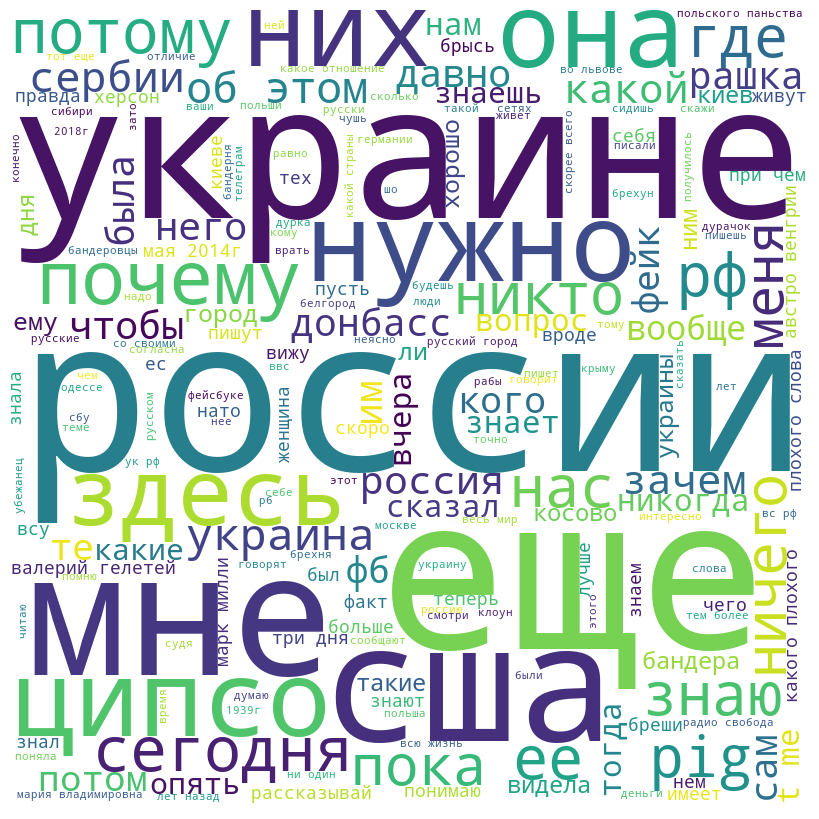

In [16]:
df = df_comments.sample(25000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Word cloud by channel

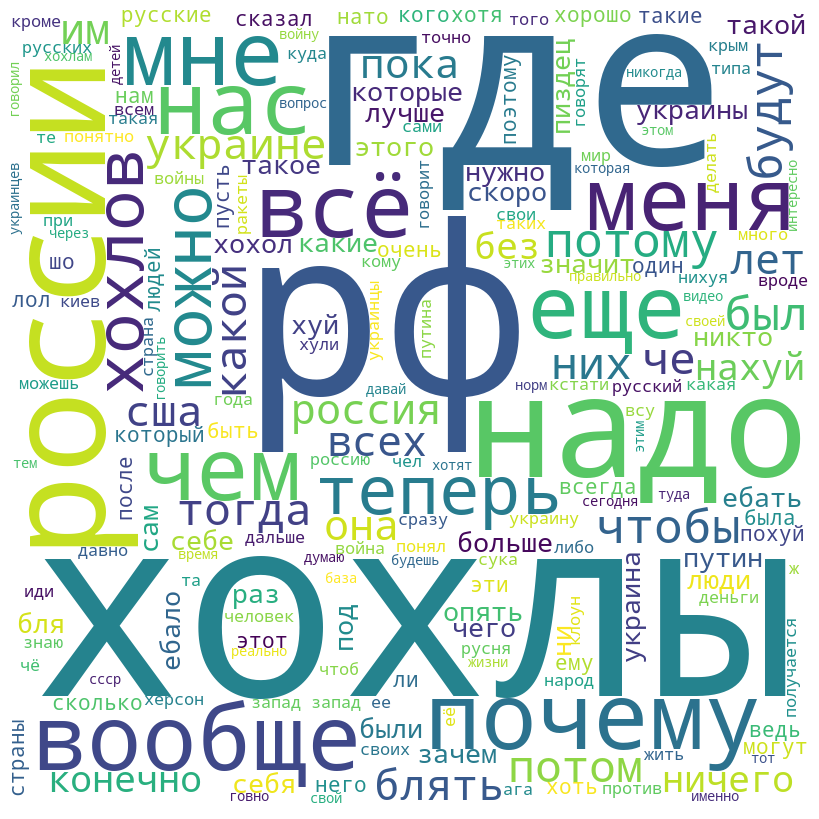

In [17]:
channel = 'ru2ch_news'  # df_comments_all
df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')


# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = df_comments_all.sample(100000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

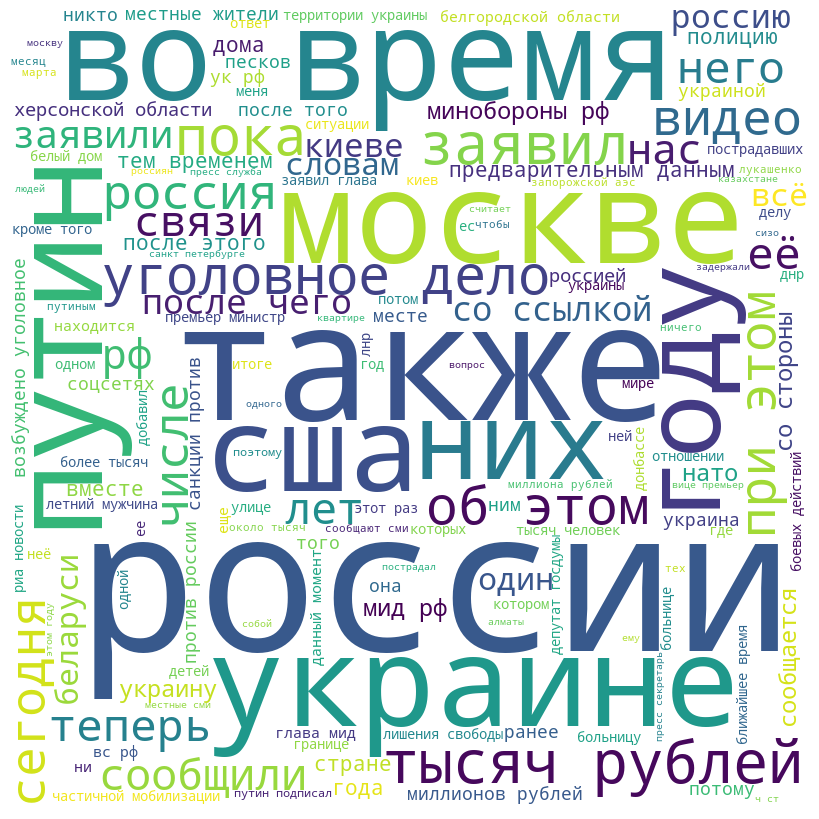

In [18]:
channel = 'ru2ch_news'  # df_messages_all
df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')


# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = df_messages_all.sample(100000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

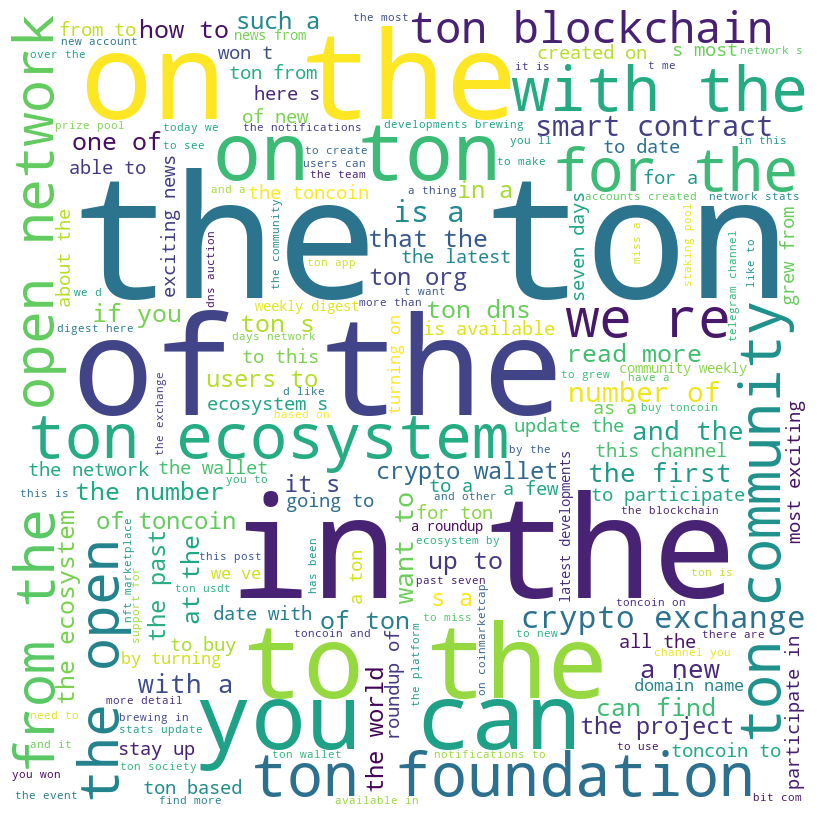

In [19]:
channel = 'toncoin'
df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')


# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = df_messages_all.sample(10000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

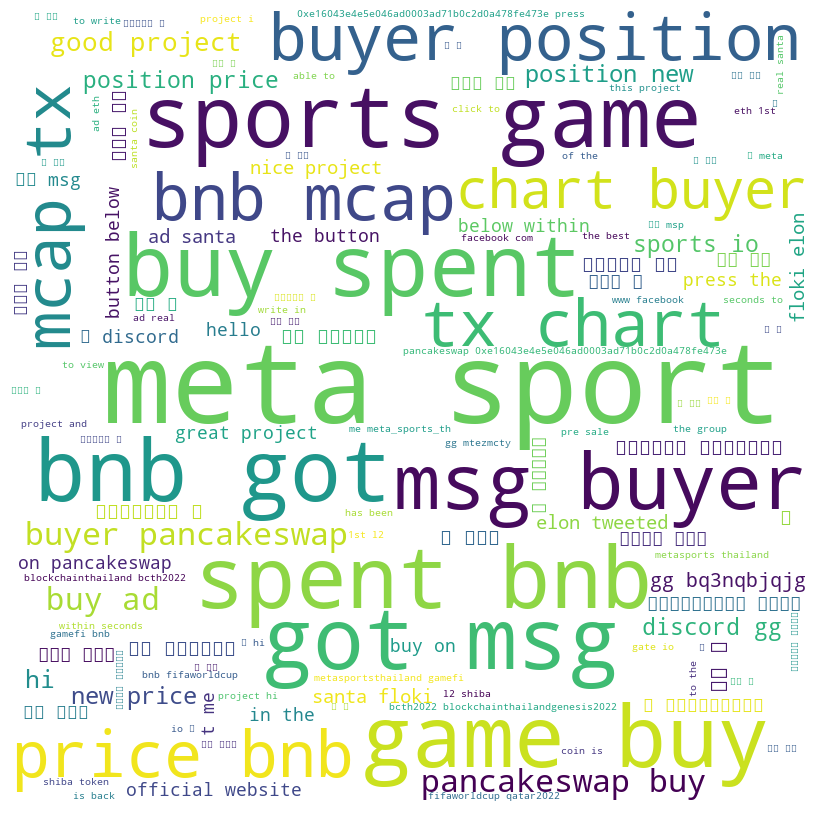

In [20]:
channel = 'meta_sports_th'
df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')


# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = df_messages_all.sample(10000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

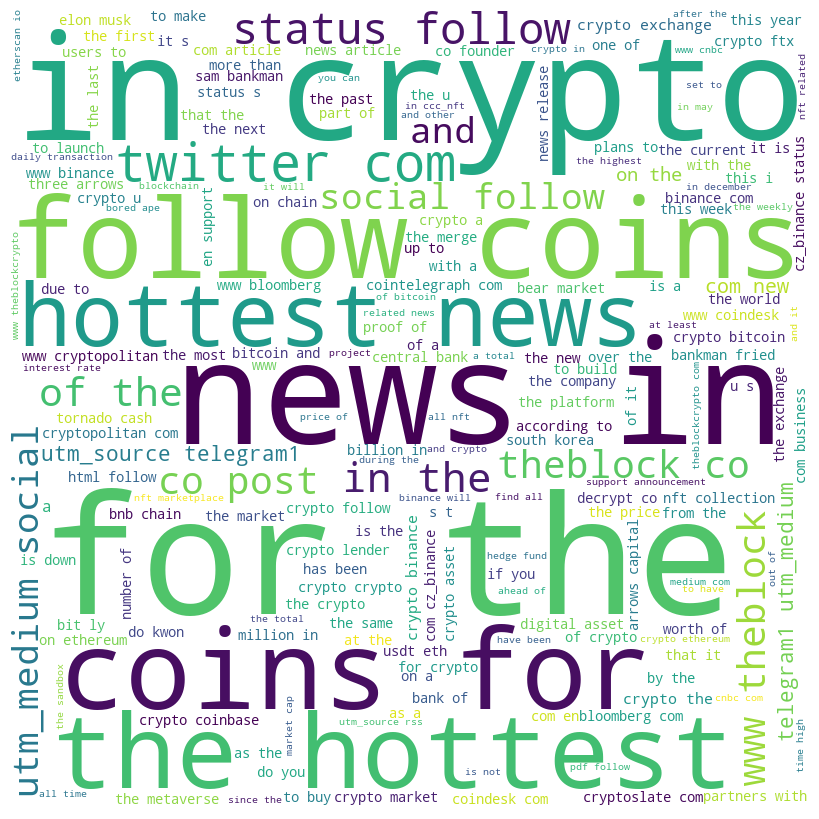

In [21]:
channel = 'Coins'
df_comments_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_comments_all.csv')
df_messages_all = pd.read_csv(path+'data\\'+channel+'\\'+'df_messages_all.csv')


# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = df_messages_all.sample(10000, replace=True)
 
comment_words = ''
STOPWORDS = ['так','и','в','не','за','на','это','а','ты','да','или','по','вот','уже',
             'только','нет','он','они','о','с','про','что','как','ну','все','же','там',
             'то','я','вы','но','из','до','от','https','youtube','у','к','для',
            'если','есть','тебя','будет', 'его','вас','их','кто','тоже','просто',
             'сейчас','youtu','be','том','когда','тебе','ещё','бы','тут','даже',
            'мы','может','вам','было']

stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()